In [1]:
# libraries
import pandas as panda
import numpy as np


In [2]:
# Variables
exoplanetCatalogFileURL = 'data/exoplanet-catalog.csv'
earthMass = 0.003145701
earthRadius = 0.091130294

In [3]:
# Prepare data and cleaning
CSVCatalog = panda.read_csv(exoplanetCatalogFileURL)
CSVCatalog = CSVCatalog.astype({'name': np.str_, 'binaryflag': np.int8, 'mass': np.float64, 'radius': np.float64 })

df = panda.DataFrame(data=CSVCatalog, columns=['name', 'binaryflag', 'mass', 'radius'])

# Filter null values
df = df.query('binaryflag == 0 and mass.notnull() > 0 and radius.notnull() > 0')

# convert mass in terms of earth mass
df.mass = df.mass.div(earthMass)

# convert radius in terms of earth radius
df.radius = df.radius.div(earthRadius)

123     Text(1.3001871442962951, 1.130030371678599, 'K...
124     Text(1.5004604697013482, 1.130030371678599, 'K...
201     Text(1.5894708365480381, 1.3936090231421836, '...
525     Text(0.8149980242877503, 0.9499026745156774, '...
526                Text(0.9999999046317499, 1.0, 'Earth')
961     Text(1.8406072287226283, 1.1960896340354175, '...
1192    Text(1.216898872461178, 1.0999964512349758, 'K...
1213    Text(1.6594075533561519, 1.1083032388768548, '...
1323    Text(1.0109034520445523, 0.7791042570322443, '...
1433    Text(1.9699901548176386, 1.1970004178851876, '...
1434    Text(0.6399209587942402, 1.212000918157907, 'K...
2354    Text(0.8392406016973641, 1.2180362328250582, '...
2619    Text(1.8088178119916674, 1.2509561310095192, '...
2871    Text(1.8698534921151122, 1.1999961286199734, '...
3228    Text(1.0172613353907445, 1.0974396724759825, '...
3229    Text(1.156181086505043, 1.0719816178799995, 'T...
3231    Text(0.772164932395037, 0.8908124448715156, 'T...
3232    Text(0

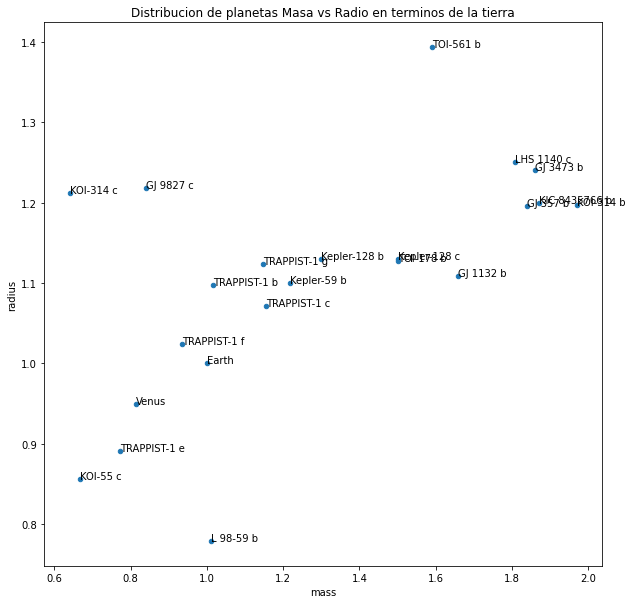

In [4]:
# Classification

# Filter by planet size, Criteria: mass 0.5 to 2 earth mass and radius
df = df.query('mass >= 0.5 and mass <= 2 and radius >= 0.5 and radius <= 1.5')

ax = df.plot(kind='scatter', title='Distribucion de planetas Masa vs Radio en terminos de la tierra', x='mass', y='radius', figsize=(10,10))
df[['mass','radius','name']].apply(lambda row: ax.text(*row),axis=1)
# Habitable Zone